<a href="https://colab.research.google.com/github/dustiny5/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

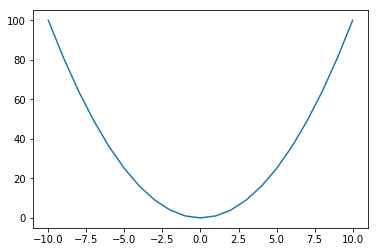

In [2]:
import matplotlib.pyplot as plt
x = range(-10,11)
y = [x*x for x in x]

plt.plot(x,y)

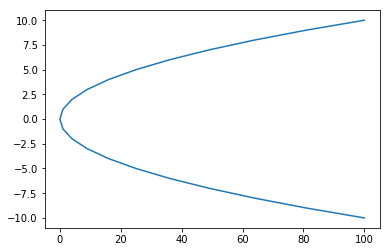

In [3]:
x = range(-10,11)
y = [x*x for x in x]

plt.plot(y,x)

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

We need one ouput for an input. If we get multiple outputs for the same input we fail the vertical line test.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Number 2 because we do not have inputs(x) returning multiple ouputs(y)

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

M-input is in 3D and its ouput is 3D
N-input is in 4D and its output is in 2D

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Possible, but it will be a crude representation since there's data missing. For instance from 2D to 3D, we do not have information on volume. 
So, no, it is usually from higher dimensions to lower dimensions.


# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [4]:
import numpy as np

p = np.array([[1,3],[-1, 2]])
q = np.array([[4,1,2],[-1,2,3],[5,1,-2]])

print(p,'\n')
print(q)

[[ 1  3]
 [-1  2]] 

[[ 4  1  2]
 [-1  2  3]
 [ 5  1 -2]]


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [5]:
p1 = [2,1]
q1 = [1,3,2]


'''
2+3(1) = 5
2(1)-2 = 0
'''
print('Matrix p:', np.matmul(p,p1),'\n')

'''
4(1)+3+2(2) = 11
-1(1)+2(3)+3(2) = 11
5(1)-2(2)+(3) = 4
'''
print('Matrix p:', np.matmul(q,q1),'\n')

Matrix p: [5 0] 

Matrix p: [11 11  4] 



# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvalues is the scalar of the eigenvectors.
Eigenvector is a vector in lower dimensionality and when rotated the direction is fixed.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

Takes to long to process the large numbers of features. High dimensions equals an increase volume of space which leads to sparse data.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

Five times the number of obsercations as you have parameters in the model.

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [6]:
import pandas as pd

url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
y = df['species']
x = df.iloc[:,:-1]

#Center
center = x-x.mean()

#Calc std of center
z = center / center.std()

#Calc Cov matrix
cov_matrix = z.cov()

#Eigenvectors and eigenvalues
values, vectors = np.linalg.eig(cov_matrix)

#Project Data
p = vectors.dot(center.T)

vectors,values

(array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]),
 array([2.91081808, 0.92122093, 0.14735328, 0.02060771]))

In [38]:
center.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667


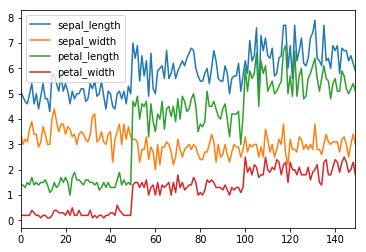

In [39]:
x.plot()

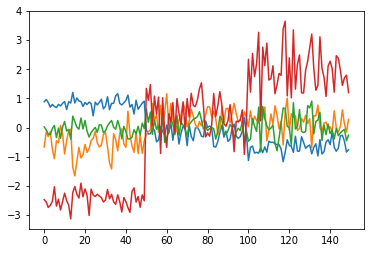

In [40]:
plt.plot(p.T)

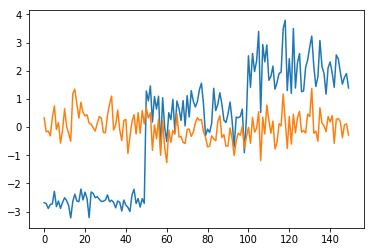

In [49]:
from sklearn.decomposition import PCA

#Create PCA instance
pca = PCA(2)

#Fit the Data
pca.fit(x)

#Values, Vectors
pca.components_,pca.explained_variance_

#Transform Data
b = pca.transform(x)

plt.plot(b)

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)